In [1]:
import pandas as pd


df=pd.read_csv(r"C:/Users/seanr/Desktop/car sell price prediction/car data.csv")

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#DATA EXPLORATION

In [2]:
df.shape

(301, 9)

In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df["Fuel_Type"].unique()
df["Seller_Type"].unique()
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [6]:
print(df["Fuel_Type"].value_counts())
print(df["Seller_Type"].value_counts())
print(df["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
#CHECK MISSING VALUES

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#DROP CAR NAME COLUMN SINCE CAR NAME WILL NOT HELP US IN MODEL PREDICTION

In [10]:
df.drop("Car_Name",axis=1,inplace=True)

In [11]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
# NOW WE NEED TO CREATE A NEW COLUMN CALLED NO_OF YEARS Which is basically the car age calculated by current year - year

In [13]:
df["no_of_years"]=2023-df["Year"]

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [15]:
df.drop("Year",axis=1,inplace=True)

In [16]:
#CREATE DUMMY VARIABLES FOR CATEGORICAL FEATURES

In [17]:

fuel_type=pd.get_dummies(df["Fuel_Type"],drop_first=True)              # WE USE DROP FIRST TO DROP ONE CATEGORY SINCE WE DONT REQURIE IT
seller_type=pd.get_dummies(df["Seller_Type"],drop_first=True)          # ALSO TO AVOID THE DUMMY TRAP
transmission=pd.get_dummies(df["Transmission"],drop_first=True)

df=pd.concat([df,fuel_type,seller_type,transmission],axis=1)
df=df.drop(["Fuel_Type","Seller_Type","Transmission"],axis=1)

df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [40]:
fuel_type=pd.get_dummies(df["Fuel_Type"])

In [41]:
fuel_type

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [ ]:
#PLOTTNG CORRELATION MAP 

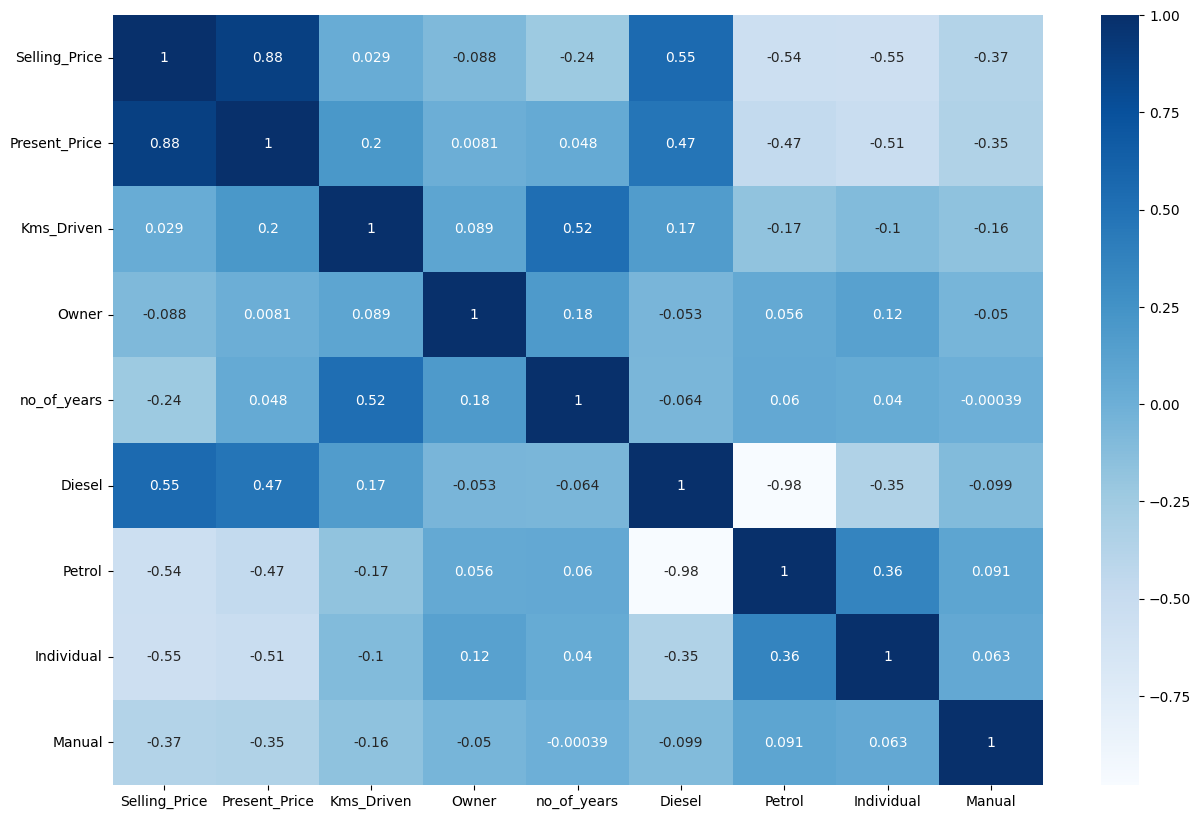

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

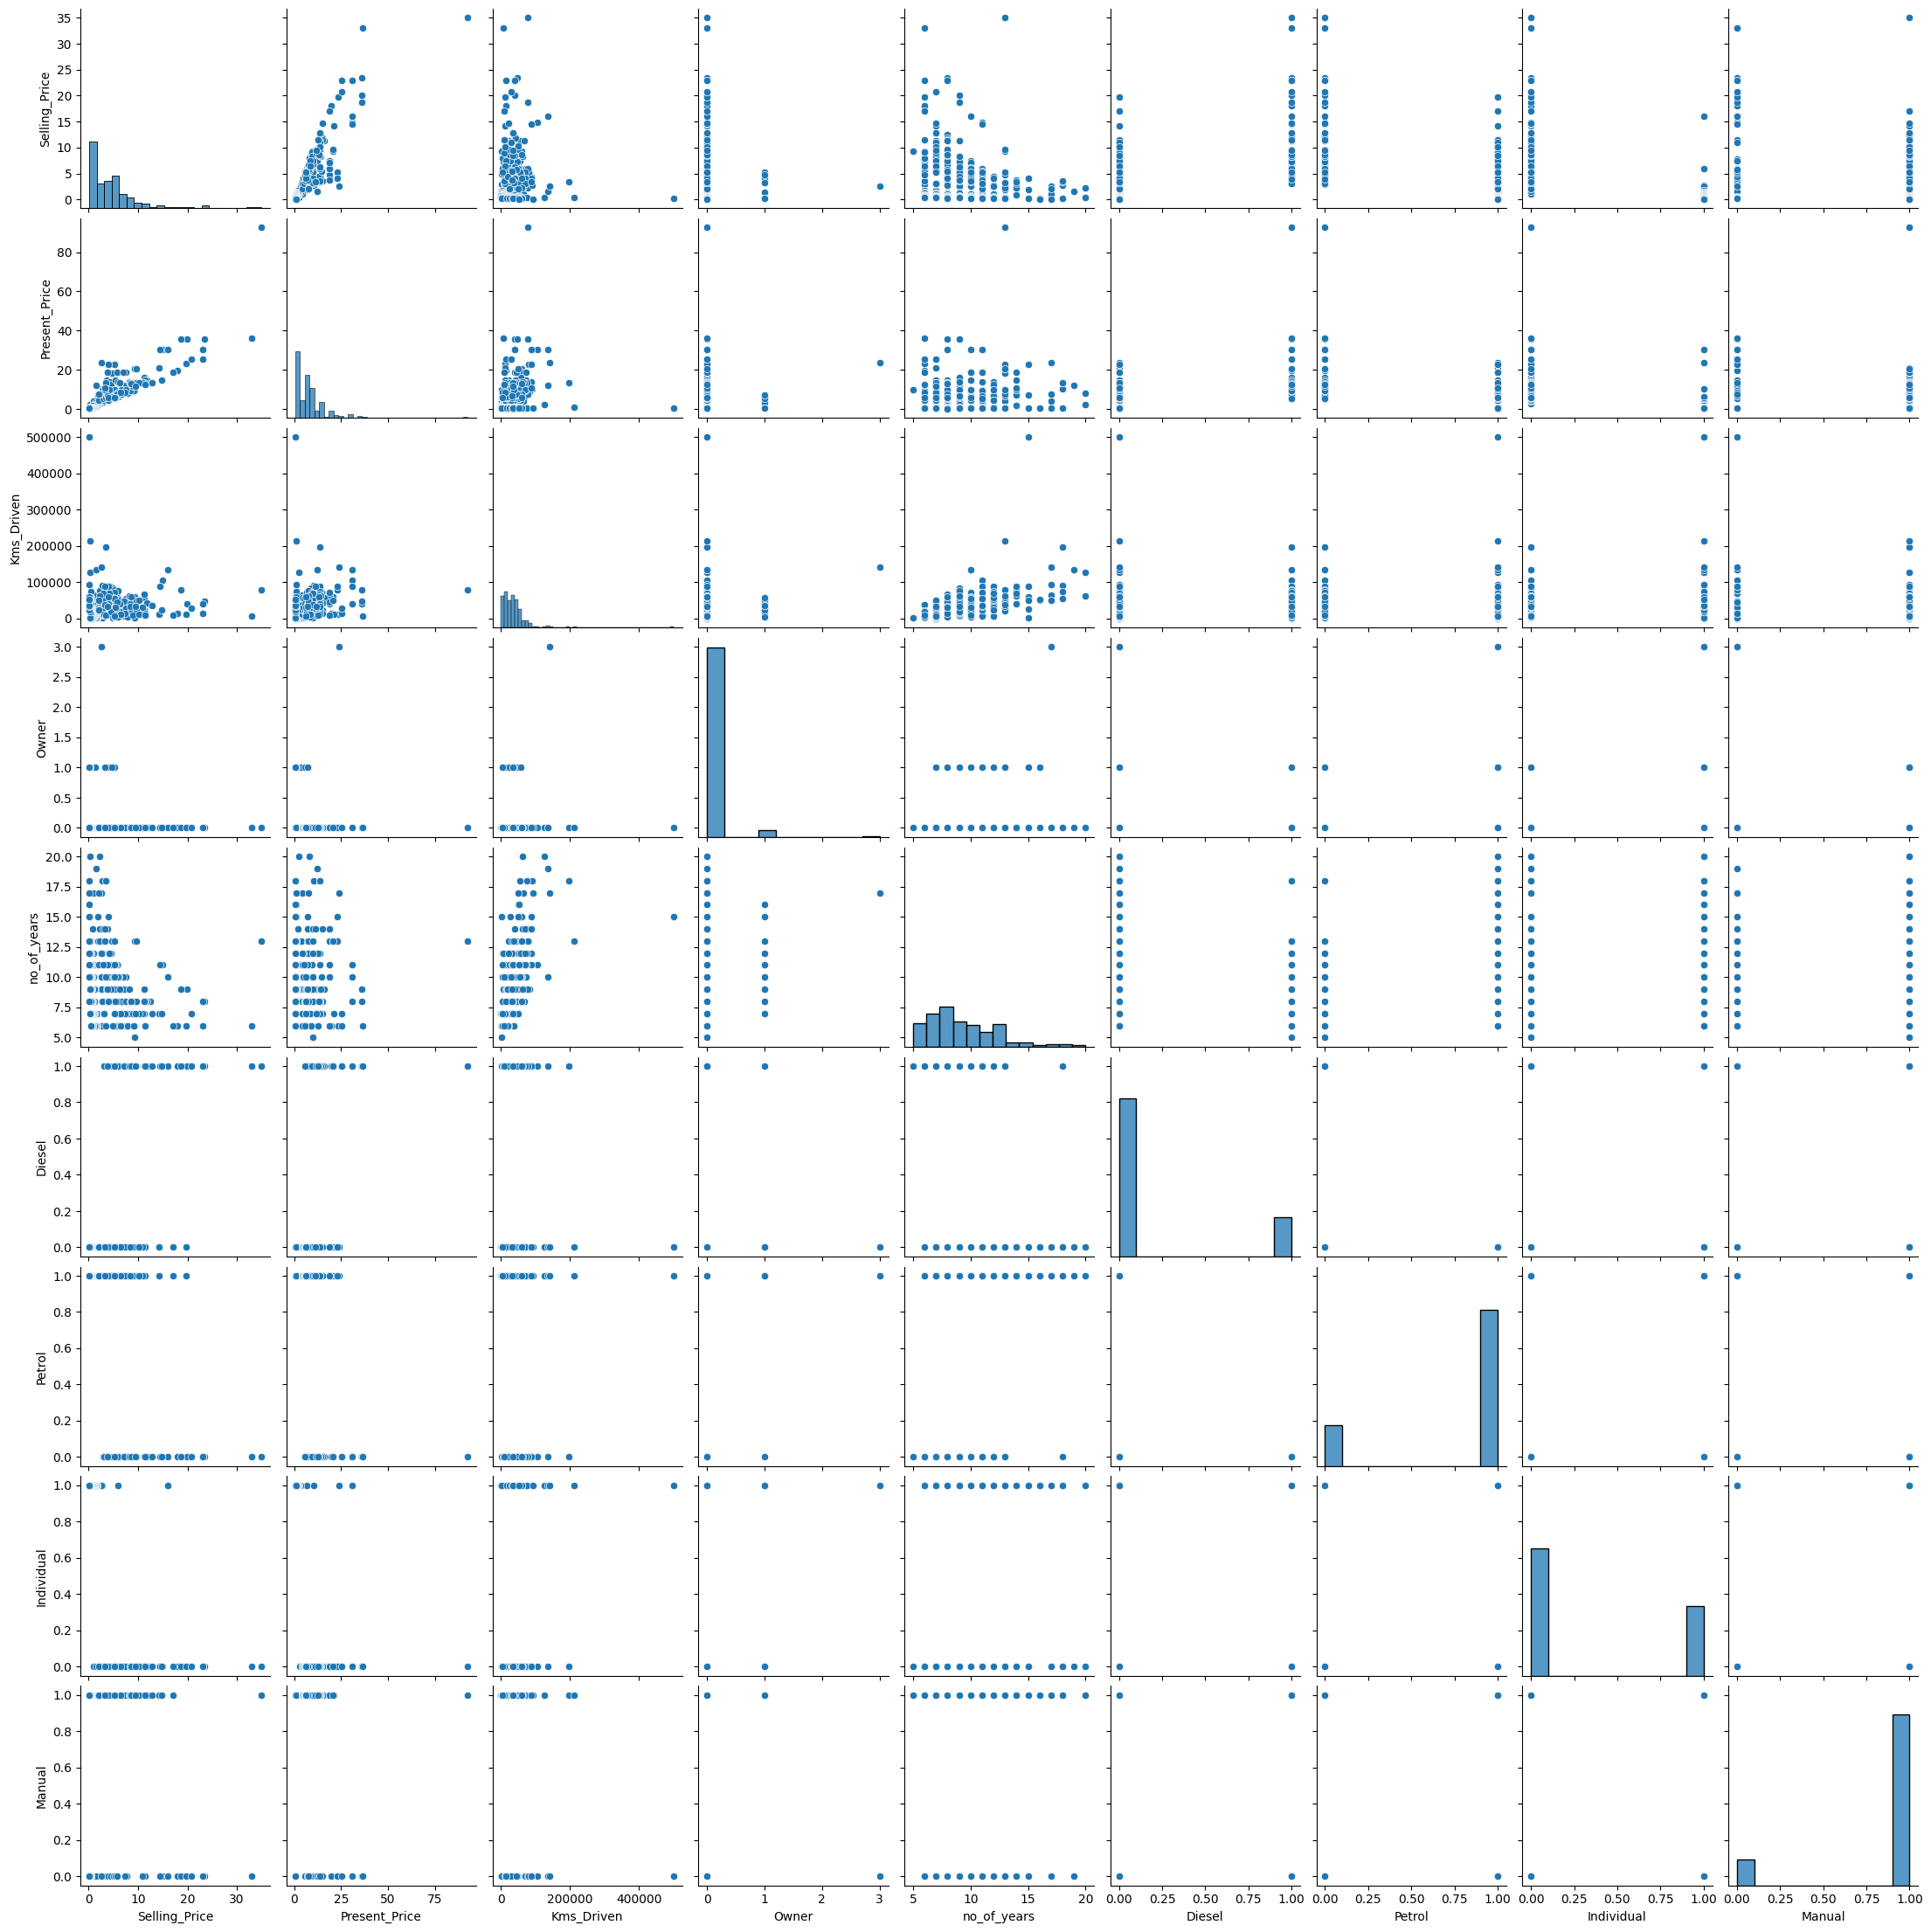

In [45]:
sns.pairplot(df)

In [46]:
df.corr().index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'no_of_years',
       'Diesel', 'Petrol', 'Individual', 'Manual'],
      dtype='object')

In [ ]:
#SPLITTING DEPENDENT AND INDEPENDENT FEATRUES

In [47]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [48]:
y=df["Selling_Price"]

x=df.drop(["Selling_Price"],axis=1)

In [51]:
x.shape

(301, 8)

In [52]:
x.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Diesel,Petrol,Individual,Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [ ]:
# FEATURE IMPORTANCE : FINDING OUT BEST FEATURES BY USING FEATURE IMPORANCE METHOD OF THE EXTRA TREES REGRESSOR MODEL

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()

model.fit(x,y)

ExtraTreesRegressor()

In [60]:
import numpy as np

model.feature_importances_

array([0.39639162, 0.04241719, 0.00177836, 0.07167732, 0.21313759,
       0.01578896, 0.129819  , 0.12898995])

In [61]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
feature_importance

Present_Price    0.396392
Kms_Driven       0.042417
Owner            0.001778
no_of_years      0.071677
Diesel           0.213138
Petrol           0.015789
Individual       0.129819
Manual           0.128990
dtype: float64

<Axes: >

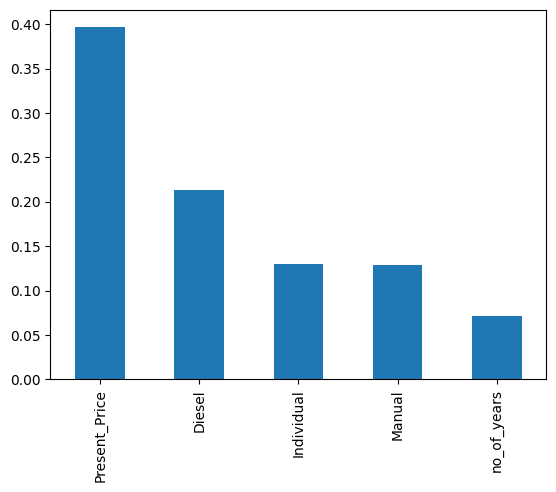

In [64]:
feature_importance.nlargest(5).plot(kind="bar")

In [ ]:
#TRAIN TEST SPLIT 

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
# MACHINE LEARNING MODELS

In [ ]:
#RANDOM FOREST

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_regressor = RandomForestRegressor(criterion="absolute_error",min_samples_split=5,min_samples_leaf=5,min_impurity_decrease=0.000001,bootstrap=True,max_samples=0.75,max_features="sqrt",oob_score=True)


rf_regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      max_samples=0.75, min_impurity_decrease=1e-06,
                      min_samples_leaf=5, min_samples_split=5, oob_score=True)

In [73]:
# TRAINING SET ACCURACY

y_pred=rf_regressor.predict(x_train)


score=mean_absolute_error(y_train,y_pred)

print("Mean Absolute Error:",score)

Mean Absolute Error: 1.215241875


In [74]:
#TESTING SET ACCURACY

y_pred=rf_regressor.predict(x_test)

score=mean_absolute_error(y_test,y_pred)

print("Mean Absolute Error:",score)

Mean Absolute Error: 1.2263836065573768


C:\Users\seanr\AppData\Local\Temp\ipykernel_24584\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Selling_Price', ylabel='Density'>

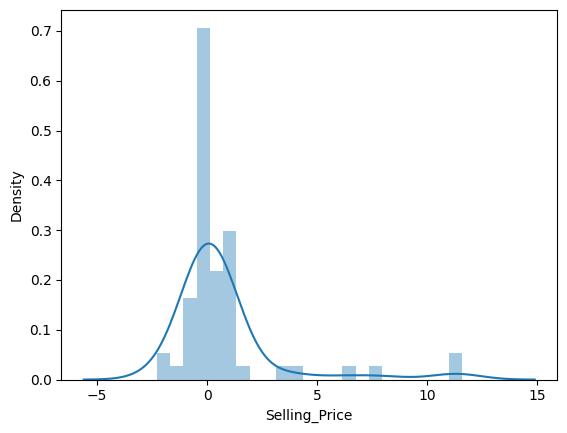

In [76]:
sns.distplot(y_test-y_pred)

In [78]:
print(y_test)

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64


In [79]:
print(y_pred)

[ 7.08905  0.72375  4.7774   8.33735 11.82875  4.9664   3.776    0.85285
  4.95     4.45865  3.326    0.88005  5.26355  6.66505  7.677    8.16495
  6.43725  4.0645   0.70835  1.14345  4.3494   4.8784   5.608    7.3485
  0.6475   0.85695  0.6926   0.7733   0.71175  4.6745   5.23195  5.79775
  0.7559   7.99475  3.79715  1.0975   5.61555  7.03735  0.62505  7.15785
  7.97525 12.04335  4.7121   4.48675  5.59275  9.6128   0.69285  0.9493
  4.391    7.4774   6.34075  4.0592   4.3935  12.46115  1.08945  1.164
  0.70105  2.94115  3.82775  1.2354   4.0665 ]


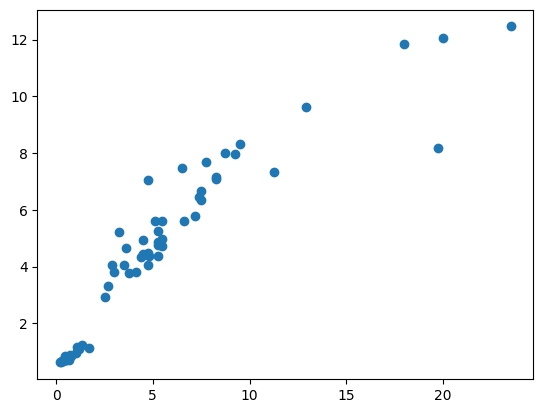

In [80]:
plt.scatter(y_test,y_pred)

#LINEAR RELATIONHIP IS A SIGN OF A GOOD MODEL

In [82]:
import pickle


# open the file location

file=open("rf_regressor_model.pkl",'wb')



In [83]:
#dump model info in that file

pickle.dump(rf_regressor,file)